# Curso de Capacitación en Python y R para Data Science - Desafío 2

<img src='https://dci.pucp.edu.pe/wp-content/uploads/2014/02/logo-color-pucp1.gif' width=200px>


Dr. Edwin Villanueva, Dra. Soledad Espezua, Ing. Daniel Saromo

<font color='#33FFEE'> Preprocesamiento de datos usando Numpy y Pandas.</font>

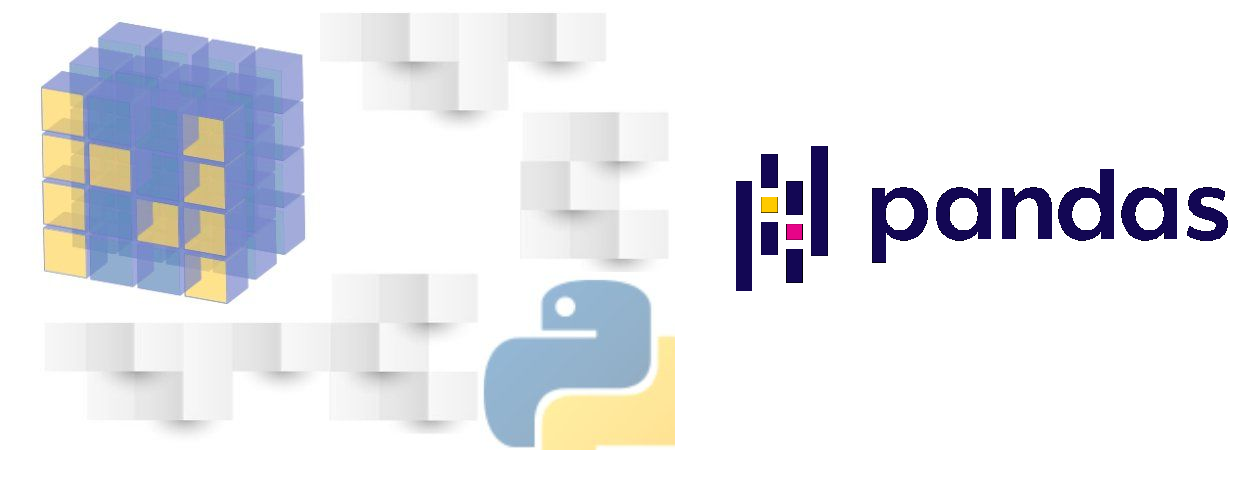

Completar con su código los campos requeridos y subir su notebook solucionado a la plataforma PAIDEIA. El formato del nombre del notebook es: `Desafio2_APELLIDOPATERNO_NOMBRE.ipynb`.

Es responsabilidad del alumno verificar que el archivo que subió es el correcto. Respetar los lineamientos de la entrega de archivo, ya que influirá en su calificación. La fecha límite de entrega del presente desafío se encuentra en PAIDEIA. No se aceptarán entregas luego de haberse publicado el solucionario de la tarea.

## Desafío de la semana <font color=red> (20 puntos) </font>

### Parte 1: Manipulación de arreglos     <font color=red> (4 puntos) </font>

In [1]:
# Importa algunas librerias base
import pandas as pd
import numpy as np

In [2]:
numpy_arr = np.array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [ 0, 49, 48, 11, 46,  6, 12,  3,  0],
                      [ 0,  7, 13, 14, 31, 32, 35, 43,  0],
                      [ 0,  8, 30, 28, 21, 26, 20, 42,  0],
                      [ 0, 45, 33, 23, 25, 27, 17,  5,  0],
                      [ 0,  9, 34, 24, 29, 22, 16, 41,  0],
                      [ 0, 10, 15, 36, 19, 18, 37, 40,  0],
                      [ 0, 47,  2, 39,  4, 44, 38,  1,  0],
                      [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
                      [ 0,  0,  0,  0,  0,  0,  0,  0,  0]])

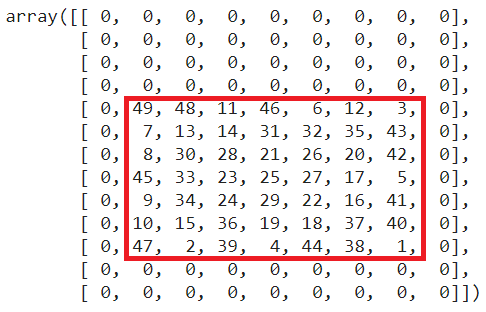

- Aplicar slicing al arreglo numpy mostrado, para extraer un arreglo de dimensiones 7x7 con todos los elementos que no son 0 en el arreglo original: 1 punto


In [3]:
matriz = numpy_arr[4:11,1:8]

In [4]:
assert (matriz.shape == (7,7)), "El arreglo seleccionado debe tener 7 filas y 7 columnas" # no borrar esta celda

- Calcular la suma de elementos de cada una de las filas de la matriz cuadrada de 7x7 extraída: 1 punto

In [5]:
matriz.sum(axis=1)

array([175, 175, 175, 175, 175, 175, 175])

- Calcular la suma de elementos de cada una de las columnas de la matriz cuadrada de 7x7 extraída: 1 punto


In [6]:
matriz.sum(axis=0)

array([175, 175, 175, 175, 175, 175, 175])

- Calcular la suma de elementos de la diagonal de la matriz cuadrada de 7x7 extraída: 1 punto

Usar la función [`np.diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html):

In [7]:
np.diag(matriz)

array([49, 13, 28, 25, 22, 37,  1])

### Parte 2: Tratamiento de valores faltantes en un conjunto de datos médico     <font color=red> (10.5 puntos) </font>

Fuente del dataset: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

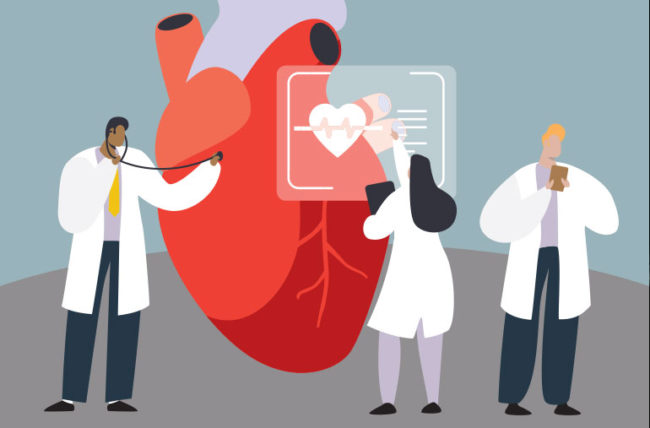

#### Descripción de los datos

**Información de los atributos del dataset:**

- 'edad': Edad
- 'sexo': Sexo (1 = masculino; 0 = femenino)
- 'tipo dolor pecho': Tipo de dolor de pecho (4 valores: 1: angina típica, 2: angina atípica, 3: dolor no anginal, 4: asintomático)
- 'pres_arterial_reposo': Presión arterial en reposo (medida en el triaje)
- 'colesterol': Nivel de colesterol (mg/dl).
- 'glucemia_alta': Glucemia en ayunas mayor a 120 mg/dl.
- 'res_ekg': Resultados del electocardiograma en reposo:
  - Valor 0: normal
  - Valor 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Valor 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- 'max_bpm': Máxima frecuencia cardíaca alcanzada
- 'ang_ej': Angina inducida por el ejercicio
- oldpeak: ST depression induced by exercise relative to rest
- 'slope': the slope of the peak exercise ST segment
- 'num_vasos': Número de vasos sanguíneos coloreados por fluoroscopía.
- 'thal': Talasemia: 3 = normal; 6 = fixed defect; 7 = reversable defect
- 'target': Riesgo de padecer un ataque cardíaco (Variable objetivo): Valor 0: Nulo o bajo riesgo; Valor 1: Riesgo alto.

En los atributos binarios, 1 quiere decir Verdadero y 0 quiere decir Falso.

In [8]:
# Carga datos de un archivo csv: Este es el dataframe incompleto
filename = "heart_missing.csv"
col_names = ['edad', 'sexo', 'tipo dolor pecho', 'pres_arterial_reposo', 'colesterol', 'glucemia_alta', 'res_ekg',
             'max_bpm', 'ang_ej', 'oldpeak', 'num_vasos', 'thal', 'target'] # nombres de las columnas

# carga datos del csv y le asigna nombres de columnas(ya que el csv no tiene cabecera)
# buenas prácticas: abrir manualmente el archivo en un editor de texto antes de cargarlo a python
# colocamos `header=0` porque el archivo csv ya tenía una cabecera, la cual sobreescribimos con el argumento `names`.
# no olvidar indicar el delimitador adecuado
# colocamos `index_col=False`, porque no queremos que la primera columna del dataset la considere como columna index 

heart_data = pd.read_csv(filename, names=col_names, header=0, delimiter=",", index_col=False)

heart_data.head()  # muestra los 5 primeros registros del DataFrame

,edad,sexo,tipo dolor pecho,pres_arterial_reposo,colesterol,glucemia_alta,res_ekg,max_bpm,ang_ej,oldpeak,num_vasos,thal,target
0,63,1,3,145.0,233.0,1,0,150,0.0,2.3,0,0,1
1,37,1,2,NaN,250.0,0,1,187,NaN,3.5,0,0,2
2,41,0,1,NaN,204.0,0,0,172,NaN,1.4,2,0,2
3,56,1,1,120.0,236.0,0,1,178,NaN,0.8,2,0,2
4,57,0,0,120.0,354.0,0,1,163,NaN,0.6,2,0,2


- Mostrar la matriz de correlación (valores numéricos y gráfico coloreado). (1 punto)

In [95]:
np.corrcoef(heart_data)

array([[1.        ,        nan,        nan, ..., 0.99488732,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.99488732,        nan,        nan, ..., 1.        ,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

- Imprimir en pantalla las estadísticas del DataFrame incompleto usando el comando `describe` de pandas (0.5 puntos):

In [10]:
heart_data.describe()

,edad,sexo,tipo dolor pecho,pres_arterial_reposo,colesterol,glucemia_alta,res_ekg,max_bpm,ang_ej,oldpeak,num_vasos,thal,target
count,303.000000,303.000000,303.000000,267.000000,300.000000,303.000000,303.000000,303.000000,8.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.842697,246.266667,0.148515,0.528053,149.646865,0.375000,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,18.676449,52.090116,0.356198,0.525860,22.905161,0.517549,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,128.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


- Imprimir en pantalla la cantidad de datos faltantes por cada columna del DataFrame (2 puntos):

In [26]:
heart_data.isnull().sum()

edad                      0
sexo                      0
tipo dolor pecho          0
pres_arterial_reposo     36
colesterol                3
glucemia_alta             0
res_ekg                   0
max_bpm                   0
ang_ej                  295
oldpeak                   0
num_vasos                 0
thal                      0
target                    0
dtype: int64

#### Ejemplo de imputación de datos

Creamos un DataFrame de ejemplo:

In [12]:
import pandas as pd
df_ejemplo = pd.DataFrame(data={'a':[1,2,3,None],'b':[4,5,None,6],'c':[None,None,7,8]})
df_ejemplo

,a,b,c
0,1.0,4.0,NaN
1,2.0,5.0,NaN
2,3.0,NaN,7.0
3,NaN,6.0,8.0


Vamos a reemplazar los `NaN` de la columna `b` y `c` por `0`. 

In [13]:
df_ejemplo[['b', 'c']] = df_ejemplo[['b','c']].fillna(0)

In [ ]:
df_ejemplo

,a,b,c
0,1.0,4.0,0.0
1,2.0,5.0,0.0
2,3.0,0.0,7.0
3,NaN,6.0,8.0


`['b', 'c']` es la lista de columnas cuyos valores `NaN` quiero reemplazar. Las columnas que no se mencionen en esta lista no serán modificadas por el comando `df_ejemplo[['b', 'c']] = df_ejemplo[['b','c']].fillna(0)`.

En efecto, la columna `'a'` no fue modificada.

#### Para desarrollar

Copiar el dataset a una nueva variable, en la cual vamos a realizar las imputaciones de datos:

In [50]:
data_imputed = heart_data.copy()

In [25]:
data_imputed.describe()

,edad,sexo,tipo dolor pecho,pres_arterial_reposo,colesterol,glucemia_alta,res_ekg,max_bpm,ang_ej,oldpeak,num_vasos,thal,target
count,303.000000,303.000000,303.000000,267.000000,300.000000,303.000000,303.000000,303.000000,8.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.842697,246.266667,0.148515,0.528053,149.646865,0.375000,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,18.676449,52.090116,0.356198,0.525860,22.905161,0.517549,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,128.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


Usando las estadísticas descriptivas, podemos observar los valores del promedio del colesterol y con la mediana (i.e., percentil 50) de la presión arterial de los pacientes.

- Calcular usando Python la mediana de los valores de presión y la media de los valores de colesterol (no ingresar manualmente los valores), y grabarlos en 2 variables diferentes: 1 punto

In [51]:
promedio_colesterol = heart_data['colesterol'].mean()
print(promedio_colesterol)
mediana_presion = heart_data['pres_arterial_reposo'].median()
print(mediana_presion)

246.26666666666668
128.0


- Imputar los valores faltantes de presión con la mediana de valores que sí se tienen en esa columna: 2.5 puntos

In [52]:
data_imputed['pres_arterial_reposo'] = heart_data['pres_arterial_reposo'].fillna(mediana_presion)

- Imputar los valores faltantes de colesterol con el promedio de valores que sí se tienen en esa columna: 2.5 puntos

In [53]:
data_imputed['colesterol'] = heart_data['colesterol'].fillna(promedio_colesterol)

- Eliminar la columna con la mayor cantidad de datos faltantes: 1 punto

In [54]:
data_imputed = data_imputed.dropna(axis=1,thresh=9)

---

Mostramos las columnas del dataframe resultante, y lo convertimos a lista:

In [55]:
data_imputed.columns.to_list()

['edad',
 'sexo',
 'tipo dolor pecho',
 'pres_arterial_reposo',
 'colesterol',
 'glucemia_alta',
 'res_ekg',
 'max_bpm',
 'oldpeak',
 'num_vasos',
 'thal',
 'target']

In [56]:
assert (len(data_imputed.columns.to_list())==12), "Error en la cantidad de columnas del dataframe imputado." # no borrar

### Parte 3: Consulta de información     <font color=red> (1.5 puntos) </font>

De aquí en adelante, **debe utilizar el dataframe IMPUTADO**.

- Calcular usando Python, el promedio de edades de todos los pacientes: 0.5 puntos



In [57]:
data_imputed['edad'].mean()

54.366336633663366

- Calcular usando Python, el promedio de edades de los pacientes que tienen la glucemia alta: 0.5 puntos

In [62]:
subset = data_imputed[data_imputed['glucemia_alta'] == 1]
subset['edad'].mean()

57.0

- Calcular usando Python, la cantidad de mujeres que tienen el colesterol mayor a 240 mg/dl: 0.5 puntos

In [67]:
subset = data_imputed[data_imputed['colesterol'] > 240]
subset[subset['sexo'] == 1]['sexo'].count()

94

### Parte 4: Operaciones de pre-procesamiento de datos     <font color=red> (4 puntos) </font>

- Binarizar los valores de la columna `'tipo dolor pecho'`, asignando el valor de 1 a los pacientes que tengan algún tipo de dolor de pecho, y colocando el valor de 0 a los pacientes asintomáticos: 2 puntos

Para esta parte, revisar la descripción de los valores (específicamente del atributo `'tipo dolor pecho'`), para determinar el umbral adecuado para realizar la binarización. El umbral puede ser un número decimal.

In [87]:
from sklearn.preprocessing import Binarizer

subset = data_imputed[['tipo dolor pecho']]

binarizer = Binarizer(threshold=2.5)

binarizerSubset = binarizer.fit_transform(subset)

binarizerSubset = 1 - binarizerSubset

data_imputed['tipo dolor pecho'] = binarizerSubset
data_imputed.head(10)

,edad,sexo,tipo dolor pecho,pres_arterial_reposo,colesterol,glucemia_alta,res_ekg,max_bpm,oldpeak,num_vasos,thal,target
0,63,1,0,145.0,233.0,1,0,150,2.3,0,0,1
1,37,1,1,128.0,250.0,0,1,187,3.5,0,0,2
2,41,0,1,128.0,204.0,0,0,172,1.4,2,0,2
3,56,1,1,120.0,236.0,0,1,178,0.8,2,0,2
4,57,0,1,120.0,354.0,0,1,163,0.6,2,0,2
5,57,1,1,140.0,192.0,0,1,148,0.4,1,0,1
6,56,0,1,140.0,294.0,0,0,153,1.3,1,0,2
7,44,1,1,120.0,263.0,0,1,173,0.0,2,0,3
8,52,1,1,172.0,199.0,1,1,162,0.5,2,0,3
9,57,1,1,150.0,168.0,0,1,174,1.6,2,0,2


In [88]:
data_imputed.head(20)

,edad,sexo,tipo dolor pecho,pres_arterial_reposo,colesterol,glucemia_alta,res_ekg,max_bpm,oldpeak,num_vasos,thal,target
0,63,1,0,145.0,233.0,1,0,150,2.3,0,0,1
1,37,1,1,128.0,250.0,0,1,187,3.5,0,0,2
2,41,0,1,128.0,204.0,0,0,172,1.4,2,0,2
3,56,1,1,120.0,236.0,0,1,178,0.8,2,0,2
4,57,0,1,120.0,354.0,0,1,163,0.6,2,0,2
5,57,1,1,140.0,192.0,0,1,148,0.4,1,0,1
6,56,0,1,140.0,294.0,0,0,153,1.3,1,0,2
7,44,1,1,120.0,263.0,0,1,173,0.0,2,0,3
8,52,1,1,172.0,199.0,1,1,162,0.5,2,0,3
9,57,1,1,150.0,168.0,0,1,174,1.6,2,0,2


- Re-escalar los valores de los atributos numéricos, para que cada columna tenga elementos que estén en el rango de 0 a 1: 2 puntos

Para el escalamiento, ignoramos algunas columnas, como `sexo`, porque si bien es cierto sus elementos son números, no representan atributos numéricos, sino clases (masculino: 0, y femenino: 1).

In [89]:
cols_numericas = ['edad', 'pres_arterial_reposo', 'colesterol', 'max_bpm', 'oldpeak', 'num_vasos']

In [91]:
from sklearn.preprocessing import MinMaxScaler

subset = data_imputed[cols_numericas]

scaler = MinMaxScaler(feature_range=(0, 1))  

rescaledSubset = scaler.fit_transform(subset)

data_rescaled = pd.DataFrame(rescaledSubset, columns=cols_numericas)

data_rescaled.describe()

,edad,pres_arterial_reposo,colesterol,max_bpm,oldpeak,num_vasos
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.352699,0.274581,0.600358,0.167678,0.699670
std,0.189210,0.165775,0.118335,0.174849,0.187270,0.308113
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.245283,0.194064,0.477099,0.000000,0.500000
50%,0.541667,0.320755,0.260274,0.625954,0.129032,0.500000
75%,0.666667,0.433962,0.339041,0.725191,0.258065,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
data_rescaled.head(20)

,edad,pres_arterial_reposo,colesterol,max_bpm,oldpeak,num_vasos
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0
1,0.166667,0.320755,0.283105,0.885496,0.564516,0.0
2,0.250000,0.320755,0.178082,0.770992,0.225806,1.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0
5,0.583333,0.433962,0.150685,0.587786,0.064516,0.5
6,0.562500,0.433962,0.383562,0.625954,0.209677,0.5
7,0.312500,0.245283,0.312785,0.778626,0.000000,1.0
8,0.479167,0.735849,0.166667,0.694656,0.080645,1.0
9,0.583333,0.528302,0.095890,0.786260,0.258065,1.0
